## Imports

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Datasets

In [48]:
natality_df = pd.read_csv("datasets/natality/db.csv")


In [49]:
natality_df = natality_df[[
    "SPECIFICATION: Specification",     # Location
    "VARIABLE: Variable",               # Type
    "TIME_PERIOD: Time period",         # Year
    "OBS_VALUE",                        # Value
]]

# Rename columns to make it easier to work with
natality_df.columns = ["location", "type", "year", "value"]

type_to_short_name = {
    "A01: Live births by municipality of residence": "Live births",
    "A02: Deaths by municipality of residence": "Deaths",
    "A03: Natural balance by municipality of residence": "Natural balance",
}

natality_df["type"] = natality_df["type"].map(type_to_short_name)

display(natality_df.dtypes)
display(natality_df.head())

# How many empty values are in the dataset?
display(natality_df.isnull().sum())
# Which rows have empty values?
display(natality_df[natality_df.isnull().any(axis=1)])


location     object
type         object
year          int64
value       float64
dtype: object

,location,type,year,value
0,CM10008: Mondercange,Live births,1987,51.0
1,CM10008: Mondercange,Live births,1988,63.0
2,CM10008: Mondercange,Live births,1989,50.0
3,CM10008: Mondercange,Live births,1990,68.0
4,CM10008: Mondercange,Live births,1991,73.0


location     0
type         0
year         0
value       99
dtype: int64

,location,type,year,value
577,CM12007: Lintgen,Natural balance,1988,NaN
694,CM05003: Goesdorf,Natural balance,1997,NaN
742,CM05007: Winseler,Natural balance,2009,NaN
766,CM08002: Dalheim,Natural balance,1997,NaN
1337,CM12003: Fischbach,Natural balance,1992,NaN
...,...,...,...,...
12326,CM03010: Wahl,Natural balance,2001,NaN
12366,CM06004: Consdorf,Natural balance,2005,NaN
12372,CM06004: Consdorf,Natural balance,2011,NaN
12374,CM06004: Consdorf,Natural balance,2013,NaN


In [50]:
# Similar to the previous dataset, the empty values just mean 0. We can fill them with 0.
natality_df["value"] = natality_df["value"].fillna(0)

display(natality_df.isnull().sum())

location    0
type        0
year        0
value       0
dtype: int64

## Some Plotting

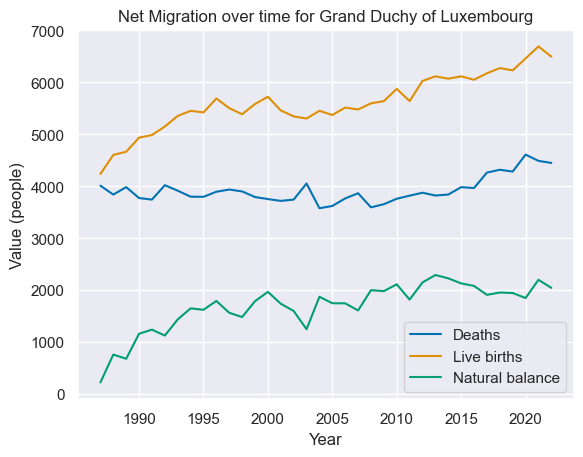

In [51]:
# Plot the net migration over time for the Grand Duchy of Luxembourg
luxembourg_natality = natality_df[natality_df["location"] == "LU: Grand Duchy of Luxembourg"]

# sns.set_theme(style="darkgrid", palette="colorblind")
for label in sorted(luxembourg_natality["type"].unique()):
    sns.lineplot(
        data=luxembourg_natality[luxembourg_natality["type"] == label],
        x="year",
        y="value",
        label=label,
    )

plt.title("Net Migration over time for Grand Duchy of Luxembourg")
plt.xlabel("Year")
plt.ylabel("Value (people)")
plt.show()


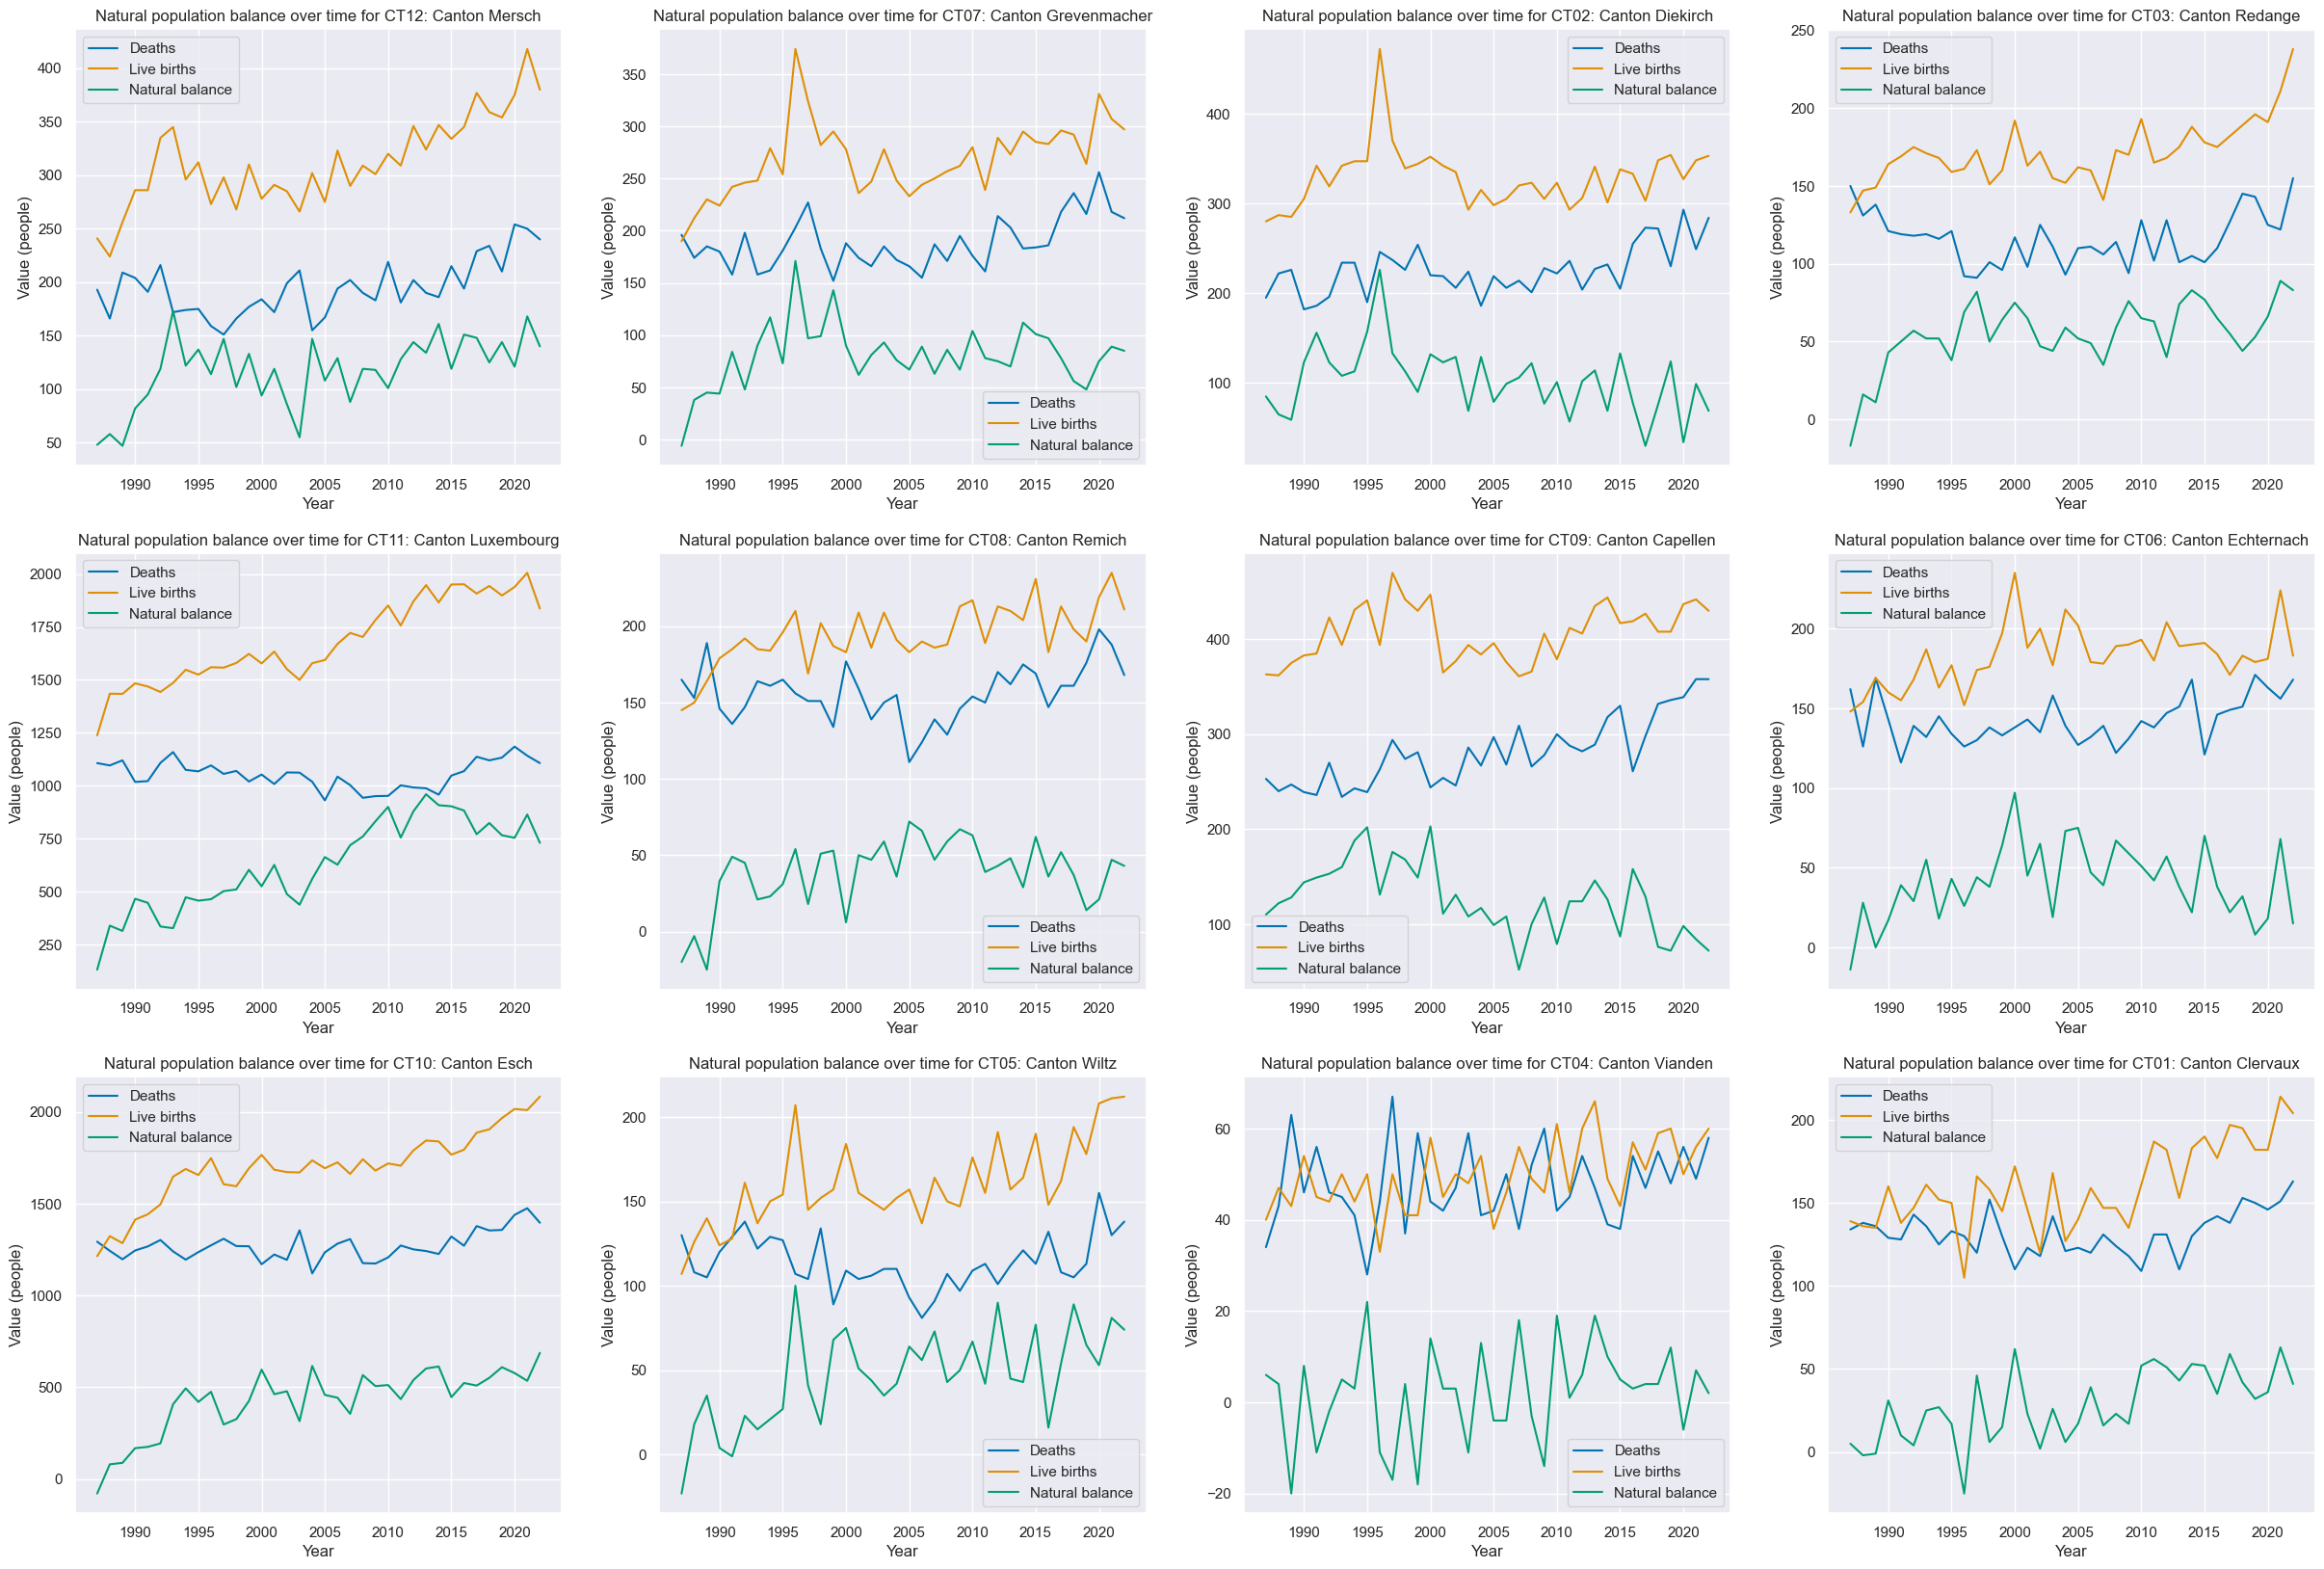

In [52]:
# Plot the net migration over time for all cantons in Luxembourg
luxembourg_cantons = natality_df[natality_df["location"].str.startswith("CT")]

# 3x4 grid of plots
fig, axes = plt.subplots(3, 4, figsize=(30, 20))
axes = axes.flatten()

for i, canton in enumerate(luxembourg_cantons["location"].unique()):
    ax = axes[i]
    for label in sorted(luxembourg_cantons["type"].unique()):
        sns.lineplot(data=luxembourg_cantons[(luxembourg_cantons["location"] == canton)
                                             & (luxembourg_cantons["type"] == label)],
                     x="year",
                     y="value",
                     label=label,
                     ax=ax)
    sns.set_theme(style="darkgrid", palette="colorblind")
    ax.set_title(f"Natural population balance over time for {canton}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Value (people)")

plt.show()


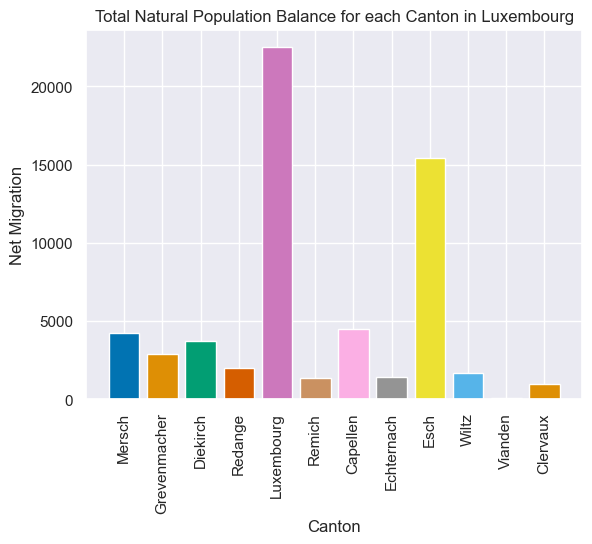

In [55]:
# Plot the net migration over time for all cantons in a single bar chart
# i.e. we have a bar for each canton, and each bar has 1 value that represents the total net migration for that canton over all years
for canton in luxembourg_cantons["location"].unique():
    canton_migration = luxembourg_cantons[(luxembourg_cantons["location"] == canton)
                                          & (luxembourg_cantons["type"] == "Natural balance")]
    total_migration = canton_migration.groupby("location")["value"].sum()
    # print(total_migration)
    plt.bar(canton.split("Canton ")[1], total_migration.values[0])

plt.title("Total Natural Population Balance for each Canton in Luxembourg")
plt.xlabel("Canton")
plt.ylabel("Natural Balance")
# X axis labels are too long, so we rotate them
plt.xticks(rotation=90)
# The scale in the y-axis is in scientific notation, so we change it to normal notation
plt.ticklabel_format(style='plain', axis='y')
plt.show()
